In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('3.01.+Country+clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
data.describe(include='all')

,Country,Latitude,Longitude,Language
count,6,6.000000,6.000000,6
unique,6,NaN,NaN,3
top,Canada,NaN,NaN,English
freq,1,NaN,NaN,4
mean,NaN,38.971667,-9.531667,NaN
std,NaN,32.155820,86.523904,NaN
min,NaN,-25.450000,-103.770000,NaN
25%,NaN,45.415000,-73.232500,NaN
50%,NaN,48.950000,-0.065000,NaN
75%,NaN,53.295000,8.400000,NaN


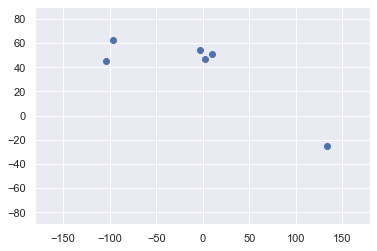

In [4]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

DataFrame.iloc(row,column) slices the dataframe, given rows and columns to be kept

In [5]:
#[:,1:3] means all rows are included, only columns 1 and 2 are included
x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [6]:
#KMeans(2) means 2 clusters will be used
kmeans=KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

sklearn.cluster.Kmeans.fit_predict(x) returns the cluster predictions in an array

In [7]:
clusters=kmeans.fit_predict(x)
clusters

array([0, 0, 1, 1, 1, 2])

In [8]:
data_clusters=data
data_clusters['Identified Clusters']=clusters
data_clusters

,Country,Latitude,Longitude,Language,Identified Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


<function matplotlib.pyplot.show(close=None, block=None)>

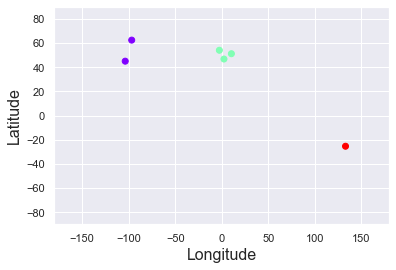

In [9]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_clusters['Identified Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.xlabel('Longitude',fontsize=16)
plt.ylim(-90,90)
plt.ylabel('Latitude',fontsize=16)
plt.show

In [10]:
data_language=data
data_language['Language']=data_language['Language'].map({'English':0,'French':1,'German':2})
data_language

,Country,Latitude,Longitude,Language,Identified Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


In [11]:
x=data_language.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [12]:
km=KMeans(3)
print(km.fit(x))
cluster_lang=km.fit_predict(x)
print(cluster_lang)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[0 0 1 1 1 2]


In [13]:
newdata_lang=data_language
new=newdata_lang.drop(['Identified Clusters'],axis=1)
new['Cluster Prediction']=cluster_lang
new

,Country,Latitude,Longitude,Language,Cluster Prediction
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


<function matplotlib.pyplot.show(close=None, block=None)>

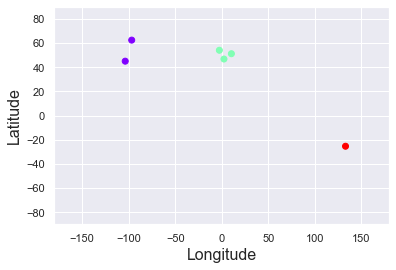

In [14]:
plt.scatter(data['Longitude'],data['Latitude'],c=new['Cluster Prediction'],cmap='rainbow')
plt.xlim(-180,180)
plt.xlabel('Longitude',fontsize=16)
plt.ylim(-90,90)
plt.ylabel('Latitude',fontsize=16)
plt.show

In [15]:
km.inertia_

290.10523333333333

In [16]:
wcss=[]
for i in range(1,7):
    km=KMeans(i)
    km.fit(x)
    wcss_iter= km.inertia_
    wcss.append(wcss_iter)
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'WCSS')

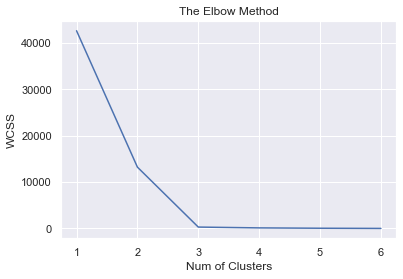

In [17]:
num_cluster=range(1,7)
plt.plot(num_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')

# Market Segmentation

In [18]:
data2=pd.read_csv('3.12.+Example.csv')
data2

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [19]:
data2.describe(include='all')

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


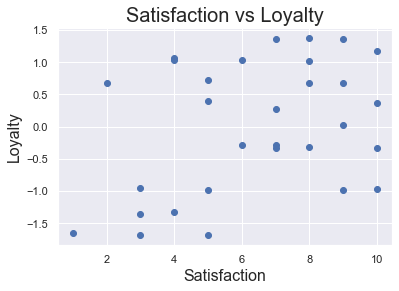

In [24]:
plt.scatter(data2['Satisfaction'],data2['Loyalty'])
plt.title('Satisfaction vs Loyalty',fontsize=20)
plt.xlabel('Satisfaction',fontsize=16)
plt.ylabel('Loyalty',fontsize=16)
plt.show()

In [28]:
x2=data2.copy()
km_loyalty=KMeans(2)
new_km=km_loyalty.fit(x2)
print(new_km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [29]:
clusters=x2.copy()
clusters['Cluster Pred']=new_km.fit_predict(x2)
clusters

,Satisfaction,Loyalty,Cluster Pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


sklearn.preprocessing.scale(x) scales and standardize with mean 0 and standard deviation of 1 for each column/variable

In [30]:
from sklearn import preprocessing
x2_scaled=preprocessing.scale(x2)
x2_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [33]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x2_scaled)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.34807941029098,
 4.380320178840311,
 3.8218624358849986]

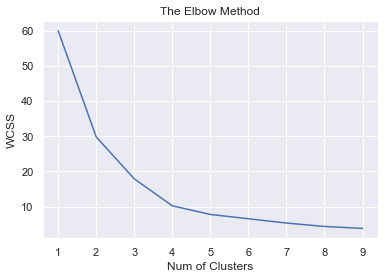

In [34]:
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
new_data=x2.copy()
new_kmeans=KMeans(4)
wow=new_kmeans.fit_predict(x2_scaled)
new_data['Customer Pred']=wow
new_data

,Satisfaction,Loyalty,Customer Pred
0,4,-1.33,3
1,6,-0.28,1
2,5,-0.99,3
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,3
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,2
9,8,0.68,2


In [44]:
heatmap_data=new_data.copy()
new_heatmap=heatmap_data.drop(['Customer Pred'],axis=1)
new_heatmap

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


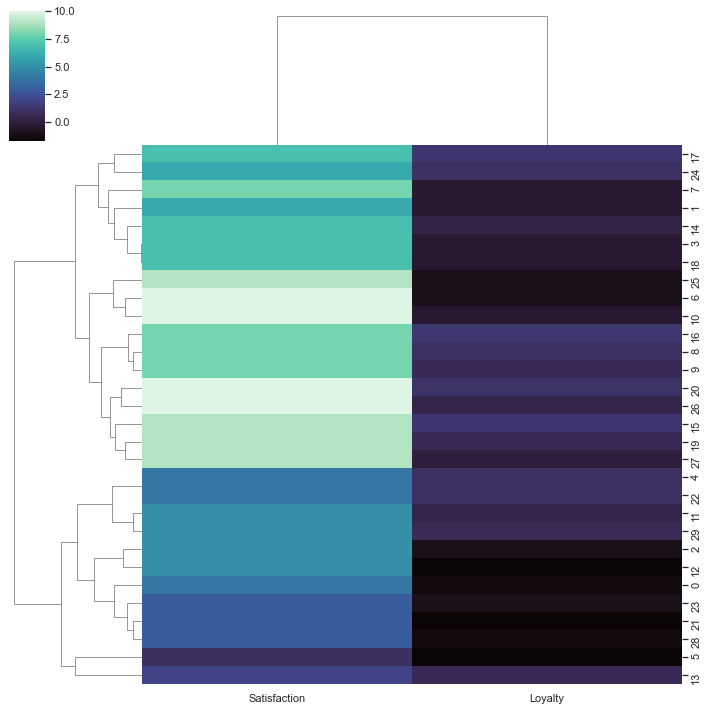

In [45]:
sns.clustermap(new_heatmap,cmap='mako')

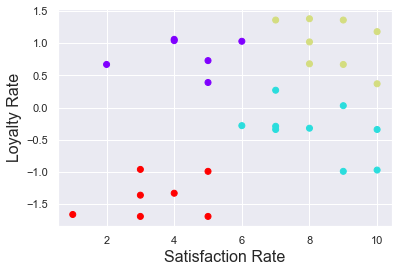

In [36]:
plt.scatter(new_data['Satisfaction'],new_data['Loyalty'],c=new_data['Customer Pred'],cmap='rainbow')
plt.xlabel('Satisfaction Rate',fontsize=16)
plt.ylabel('Loyalty Rate',fontsize=16)
plt.show()

In [38]:
data6=pd.read_csv('Country+clusters+standardized.csv',index_col='Country')
data6

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2
Australia,-2.003422,1.648581,0


In [40]:
newdata6=data6.copy()
new=newdata6.drop(['Language'],axis=1)
new

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


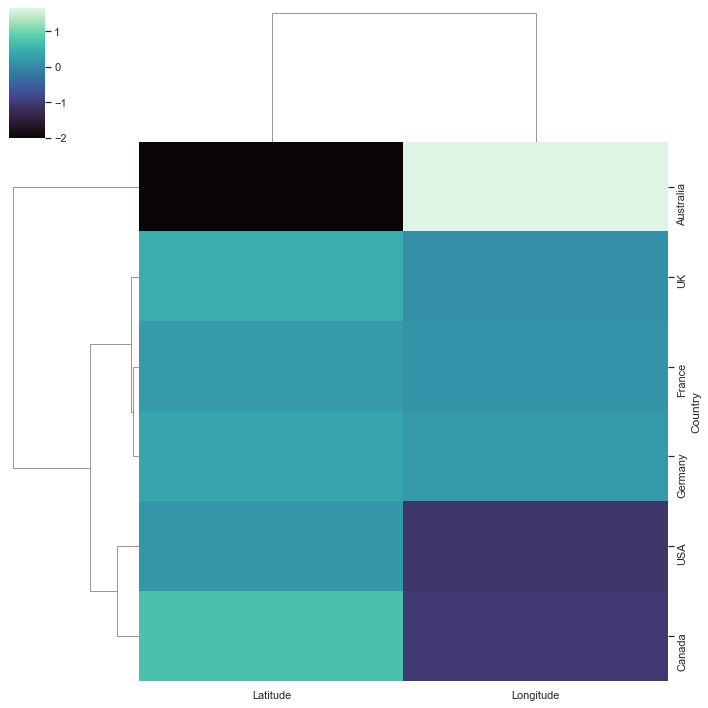

In [42]:
#HEATMAP
sns.clustermap(new,cmap='mako')